# Método de Euler via planilha eletrônica  
Considere a equação diferencial para um corpo em queda livre com resistência do ar:

d v d t = − g − b m v

onde g é a aceleração da gravidade, b é o coeficiente de arrasto, e m é a massa do corpo. A equação acima é uma equação diferencial de condição inicial (IVP = initial value problem).

Considere g = 9.8 m/s², b = 0.1 kg/s, e m = 1 kg. A condição inicial é v ( 0 ) = 0 m/s.

# Atividades mínimas: 65 pts

1a. Considerando que o tempo avança em passos discretos na forma de t n = n Δ t , sendo Δ t o passo temporal, use o método de Euler para obter a formula iterativa para a velocidade no instante t n + 1 em termos dos dados em t n :

v n + 1 = v n + ( − g − b m v n ) Δ t

1b. Usando Δ t = 0.1 s, faça uma tabela no Excel com os valores de t n e v n para n = 0 , 1 , … , 100 . Use a fórmula de Euler para calcular v n + 1 a partir de v n iterativamente no Excel ou outras planilhas eletrônicas equivalentes.

1c. Usando as duas colunas obtidas no item anterior, use as funções gráficas da planilha eletrônica para fazer um gráfico de v n em função de t n . Verifique se a velocidade terminal atinginda bate com o valor esperado.


# Atividades intermediárias: 20 pts

1d. Refaça o mesmo problema acima, mas agora em python usando arrays do numpy para armazenar t n e v n e matplotlib para os gráficos.


In [4]:
import numpy as np

def MetodoDeEuler(dt,n,t0,y0):

    # Definindo a função f(t,y)
    def f(t, y):

        return (-9.8-(0.1)*y)*t

    # Inicializando os arrays
    t = []
    y = []

    # Condições iniciais
    t.append(t0)
    y.append(y0)

    # Método de Euler
    for i in range(n):
        t.append(t[i] + dt)
        y.append(y[i] + dt*f(t[i], y[i]))

    return t, y
t ,y = MetodoDeEuler(0.1, 100, 0, 0)
np.savez('euler', t=t, y=y)

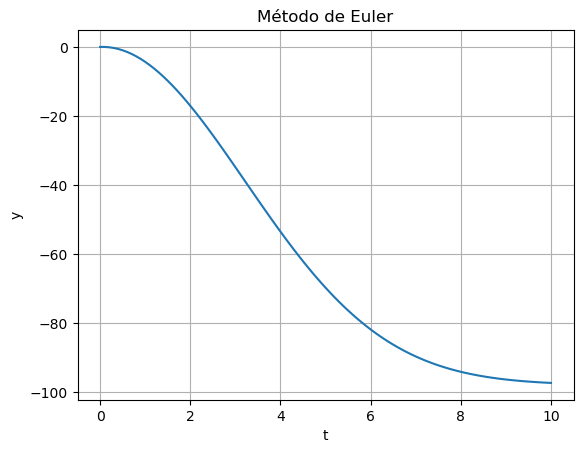

In [5]:
import matplotlib.pyplot as plt

# Carregando os dados
data = np.load('euler.npz')
t = data['t']
y = data['y']
# Plotando os resultados
plt.plot(t, y)
plt.title('Método de Euler')
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.show()

In [7]:
import numpy as np

def RK4(dt, n, t0, y0):

    # Definindo a função f(t,y)
    def f(t, y):
        return (-9.8-(0.1)*y)*t

    # Inicializando os arrays
    t = []
    y = []

    # Condições iniciais
    t.append(t0)
    y.append(y0)

    # Método de Runge-Kutta de 4ª ordem
    for i in range(n):
        t.append(t[i] + dt)
        k1 = dt * f(t[i], y[i])
        k2 = dt * f(t[i] + dt/2, y[i] + k1/2)
        k3 = dt * f(t[i] + dt/2, y[i] + k2/2)
        k4 = dt * f(t[i] + dt, y[i] + k3)
        y.append(y[i] + (k1 + 2*k2 + 2*k3 + k4)/6)

    return t, y
t, y = RK4(0.1, 100, 0, 0)
np.savez('rk4', t=t, y=y)

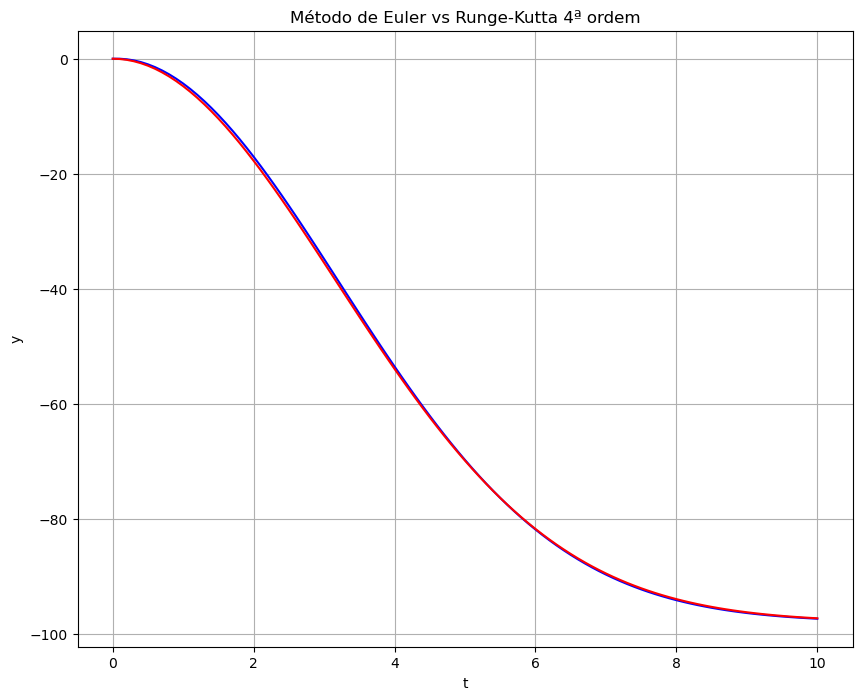

In [10]:
import matplotlib.pyplot as plt


# Carregando os dados
data1 = np.load('euler.npz')
data = np.load('rk4.npz')
t1 = data1['t']
y1 = data1['y']
t = data['t']
y = data['y']
# Plotando os resultados
fig , ax = plt.subplots(figsize=(10, 8))

ax.plot(t1, y1, label='Euler',color='blue')
ax.plot(t, y, label='Runge-Kutta 4ª ordem',color='red')
ax.set_title('Método de Euler vs Runge-Kutta 4ª ordem')
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.grid()


plt.show()